In [1]:
%matplotlib widget
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('mag_test.csv', sep=';')
mag_cols = ['mag_x','mag_y','mag_z']
acc_cols = ['acc_x','acc_y','acc_z']
df.set_index('tick', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2637 entries, 0 to 2636
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   acc_x   2637 non-null   int64
 1   acc_y   2637 non-null   int64
 2   acc_z   2637 non-null   int64
 3   mag_x   2637 non-null   int64
 4   mag_y   2637 non-null   int64
 5   mag_z   2637 non-null   int64
dtypes: int64(6)
memory usage: 144.2 KB


<Axes: xlabel='tick'>

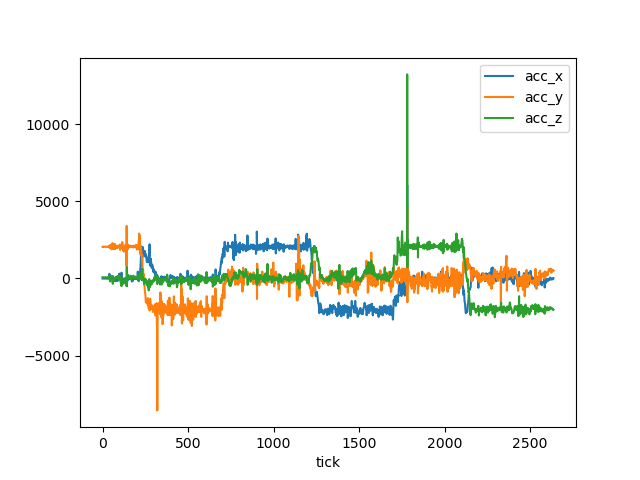

In [2]:
acc_data = df[acc_cols]
acc_data.plot()

<Axes: xlabel='tick'>

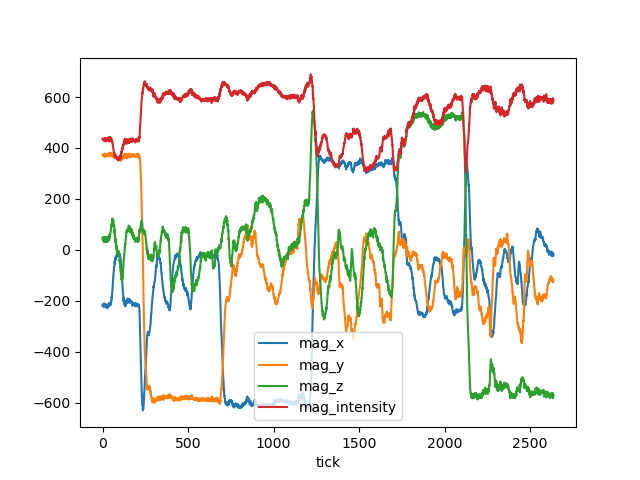

In [3]:
m_uncomp = df[mag_cols].copy()
m_uncomp["mag_intensity"] = m_uncomp.pow(2).sum(axis=1).pow(0.5)
m_uncomp.plot()

<Axes: xlabel='tick'>

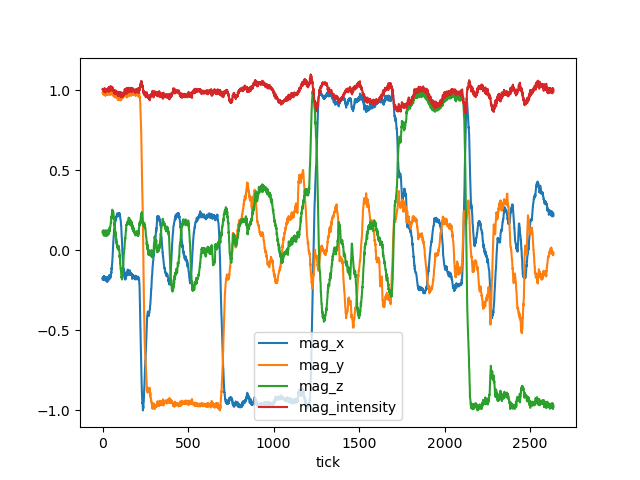

In [4]:
V = (df[mag_cols].min() + df[mag_cols].max()) / 2
S = (df[mag_cols].max() - df[mag_cols].min()) / 2
m_comp = ((df[mag_cols] - V) / S).copy()
m_comp["mag_intensity"] = m_comp.pow(2).sum(axis=1).pow(0.5)
m_comp.plot()

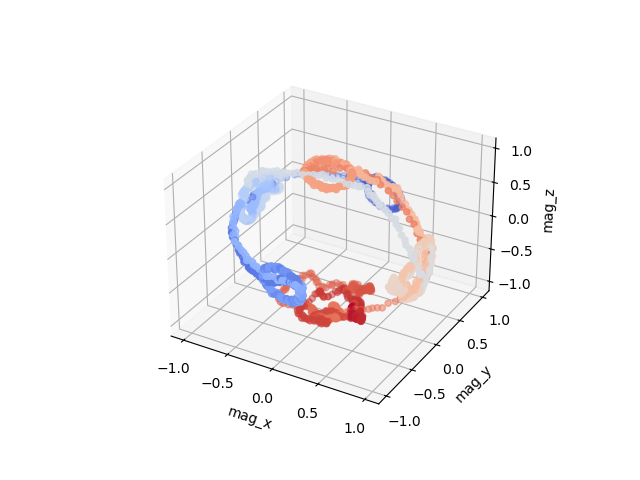

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter3D(
    m_comp["mag_x"],
    m_comp["mag_y"],
    m_comp["mag_z"],
    c=np.linspace(0, 1, len(m_comp)),
    cmap=plt.cm.coolwarm,
)
ax.set_xlabel(m_comp.columns[0])
ax.set_ylabel(m_comp.columns[1])
ax.set_zlabel(m_comp.columns[2])
plt.show()